### What is an outlier?
An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### What are the criteria to identify an outlier?

1. Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
2. Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

### What is the reason for an outlier to exists in a dataset?

1. Variability in the data
2. An experimental measurement error

### What are the impacts of having outliers in a dataset?

1. It causes various problems during our statistical analysis
2. It may cause a significant impact on the mean and the standard deviation

### Various ways of finding the outlier.
1. Using scatter plots
2. Box plot
3. using z score
4. using the IQR interquantile range



In [2]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

## Plotting the dataset

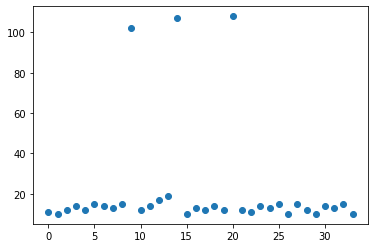

In [3]:
plt.scatter(x=range(0, len(dataset)), y=dataset)
plt.show()

## Detecting outlier using Z score

### Using Z score

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [4]:
outliers=[]
threshold=3
def detect_outliers(data):    
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [5]:
outlier_pt=detect_outliers(dataset)

In [6]:
outlier_pt

[102, 107, 108]

### Get z-score using Seaborn

In [7]:
import scipy.stats as sts

In [8]:
zscores = sts.zscore(dataset)
zscores

array([-0.38587723, -0.4237958 , -0.34795866, -0.27212152, -0.34795866,
       -0.23420294, -0.27212152, -0.31004009, -0.23420294,  3.06471282,
       -0.34795866, -0.27212152, -0.1583658 , -0.08252866,  3.25430567,
       -0.4237958 , -0.31004009, -0.34795866, -0.27212152, -0.34795866,
        3.29222425, -0.34795866, -0.38587723, -0.27212152, -0.31004009,
       -0.23420294, -0.4237958 , -0.23420294, -0.34795866, -0.4237958 ,
       -0.27212152, -0.31004009, -0.23420294, -0.4237958 ])

In [9]:
np.abs(zscores) > threshold

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [10]:
df = pd.DataFrame(dataset)#, columns=['X'])
df['zscore'] = df.apply(sts.zscore)
df[np.abs(df['zscore']) > threshold]

,0,zscore
9,102,3.064713
14,107,3.254306
20,108,3.292224


## Inter-Quartile Range

75%- 25% values in a dataset

### Steps:
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4. Find lower bound `q1*1.5`
5. Find upper bound `q3*1.5`

Anything that lies outside of lower and upper bound is an outlier

In [11]:
## Perform all the steps of IQR
sorted(dataset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [12]:
quantile1, quantile3= np.percentile(dataset,[25,75])

In [13]:
print(quantile1,quantile3)

12.0 15.0


In [14]:
## Find the IQR

iqr=quantile3-quantile1
print(iqr)

3.0


In [15]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr) 
upper_bound_val = quantile3 +(1.5 * iqr) 

In [16]:
print(lower_bound_val,upper_bound_val)

7.5 19.5
